In [34]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Other imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "Classifications"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# KNN

In [35]:
data = pd.read_csv("hw06_data1.csv")
X = data.drop('TARGET CLASS', axis=1)
y = data['TARGET CLASS']
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [37]:
knn = KNeighborsClassifier(n_neighbors=63, metric='euclidean')
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=63)

In [38]:
pred = knn.predict(X_test)
print(pred)

[0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1
 0 0 0 0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 0 1 1 1 1
 0 0 0 0 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 1 1 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0 1
 1 0 0 0]


In [39]:
print(confusion_matrix(y_test, pred))

[[136   6]
 [  8 150]]


In [40]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       142
           1       0.96      0.95      0.96       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



In [41]:

from sklearn.model_selection import cross_val_score

accuracy_rate = []

for i in range(1,41):   
    knn = KNeighborsClassifier(n_neighbors=i, metric='euclidean')
    score=cross_val_score(knn,X_train,y_train,cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy')

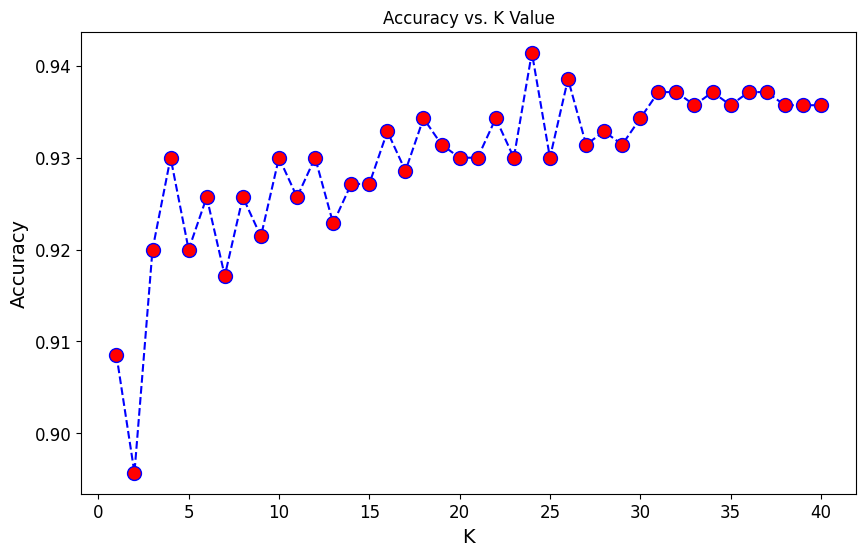

In [42]:

plt.figure(figsize=(10,6))
plt.plot(range(1,41),accuracy_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')

# Naive Bayes

In [43]:
data2 = pd.read_csv("hw06_data2.txt", delimiter="\t", names=['label', 'message'])

In [44]:
X = data2['message']
y = data2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [45]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_transformed = vectorizer.fit_transform(X_train)
X_test_transformed = vectorizer.transform(X_test)

In [46]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_transformed, y_train)

MultinomialNB()

In [47]:
pred = nb.predict(X_test_transformed)
print(pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [48]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       975
        spam       0.97      0.91      0.94       140

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115



## KNN
#### Confusion Matrix:
```
    [[136  12]
    [  3 149]]
```

#### Classification Reports:
    ```
                            precision    recall  f1-score   support

                        0       0.98      0.92      0.95       148
                        1       0.93      0.98      0.95       152

                 accuracy                           0.95       300
                macro avg       0.95      0.95      0.95       300
             weighted avg       0.95      0.95      0.95       300
    ```

### Elbow Method
By looking at the chart I would say between 25 and 35 is a good range of K values because they are decently good accuracy and not very volitile only a single outlier around 31.

## Naive Bayes:
#### Confusion Matrix
```
    [[960   2]
    [ 11 142]]
```

#### Classification Report
    ```
                          precision    recall  f1-score   support

                     ham       0.99      1.00      0.99       962
                    spam       0.99      0.93      0.96       153

                accuracy                           0.99      1115
               macro avg       0.99      0.96      0.97      1115
            weighted avg       0.99      0.99      0.99      1115
    ```

The Naive Bayes model performed very well at determining if the messages were spam or not (ham). The accuracy was 99% and the other features were high aswell.
for ham it was .99 precision, 1 recall, .99 f1 score, and for spam it was .99 precision aswell, .93 recall, and .96 f1 score. Its important that these metrics are high for both classified as spam or ham however it would likely be better if a spam message got into a real mail inbox rather than something accidentally being classified as spam. Either way, this model performed very well at sorting these out. Because the f1 score is high, we know we have a good balance of determining if something is spam or ham so this along with our 99% accuracy means the model is performing very well.